In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Product Performance and Market Insights Analysis

This worksheet aims to help the team understand product performance before designing the web app.

In [2]:
#Read the file as dataframe
df = pd.read_csv('/content/amazon_bestseller.csv')
df.head()

,rank,asin,name,ratings_count,rating,sale_price,image,product_url,category,brand,...,three_star,two_star,one_star,ratings_count_zscore,sale_price_zscore,ratings_count_minmax,sale_price_minmax,estimated_revenue,quality_score,price_to_quality_ratio
0,1,B0CJM1GNFQ,Amazon Fire TV Stick 4K with AI-powered Fire T...,41456.0,4.7,49.99,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Amazon-Fire-TV-Stick-4K...,Amazon Devices & Accessories,Amazon,...,0.03,0.01,0.03,-0.078299,0.083677,0.051697,0.066742,2072385.44,49.972337,1.000353
1,2,B0B1N5FK48,Blink Outdoor 4 – Wireless smart security came...,24950.0,4.2,259.99,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Blink-Outdoor-4th-Gen-3...,Amazon Devices & Accessories,Blink,...,0.06,0.05,0.11,-0.274733,2.882136,0.031113,0.347116,6486750.50,42.523611,6.114015
2,3,B08C1W5N87,"Amazon Fire TV Stick, HD, sharp picture qualit...",498544.0,4.7,39.99,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/fire-tv-stick-with-3rd-...,Amazon Devices & Accessories,Amazon,...,0.03,0.01,0.03,5.361405,-0.049583,0.621697,0.053391,19936774.56,61.661411,0.648542
3,4,B0BP9SNVH9,"Amazon Fire TV Stick 4K Max, our most powerful...",35230.0,4.6,59.99,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/all-new-amazon-fire-tv-...,Amazon Devices & Accessories,Amazon,...,0.03,0.01,0.04,-0.152393,0.216937,0.043933,0.080093,2113447.70,48.160536,1.245626
4,5,B08SG2MS3V,"Blink Video Doorbell | Two-way audio, HD video...",150354.0,4.2,59.99,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Blink-Video-Doorbell/dp...,Amazon Devices & Accessories,Blink,...,0.07,0.04,0.09,1.217672,0.216937,0.187495,0.080093,9019736.46,50.067169,1.198190


In [3]:
# explore the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    720 non-null    int64  
 1   asin                    720 non-null    object 
 2   name                    720 non-null    object 
 3   ratings_count           720 non-null    float64
 4   rating                  720 non-null    float64
 5   sale_price              720 non-null    float64
 6   image                   720 non-null    object 
 7   product_url             720 non-null    object 
 8   category                720 non-null    object 
 9   brand                   720 non-null    object 
 10  seller                  720 non-null    object 
 11  availability_status     720 non-null    int64  
 12  is_prime_y              720 non-null    bool   
 13  is_aplus_page           720 non-null    bool   
 14  video_count             720 non-null    fl

1. What are the top-rated products?

<ipython-input-34-fb5b52e7b19c>:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


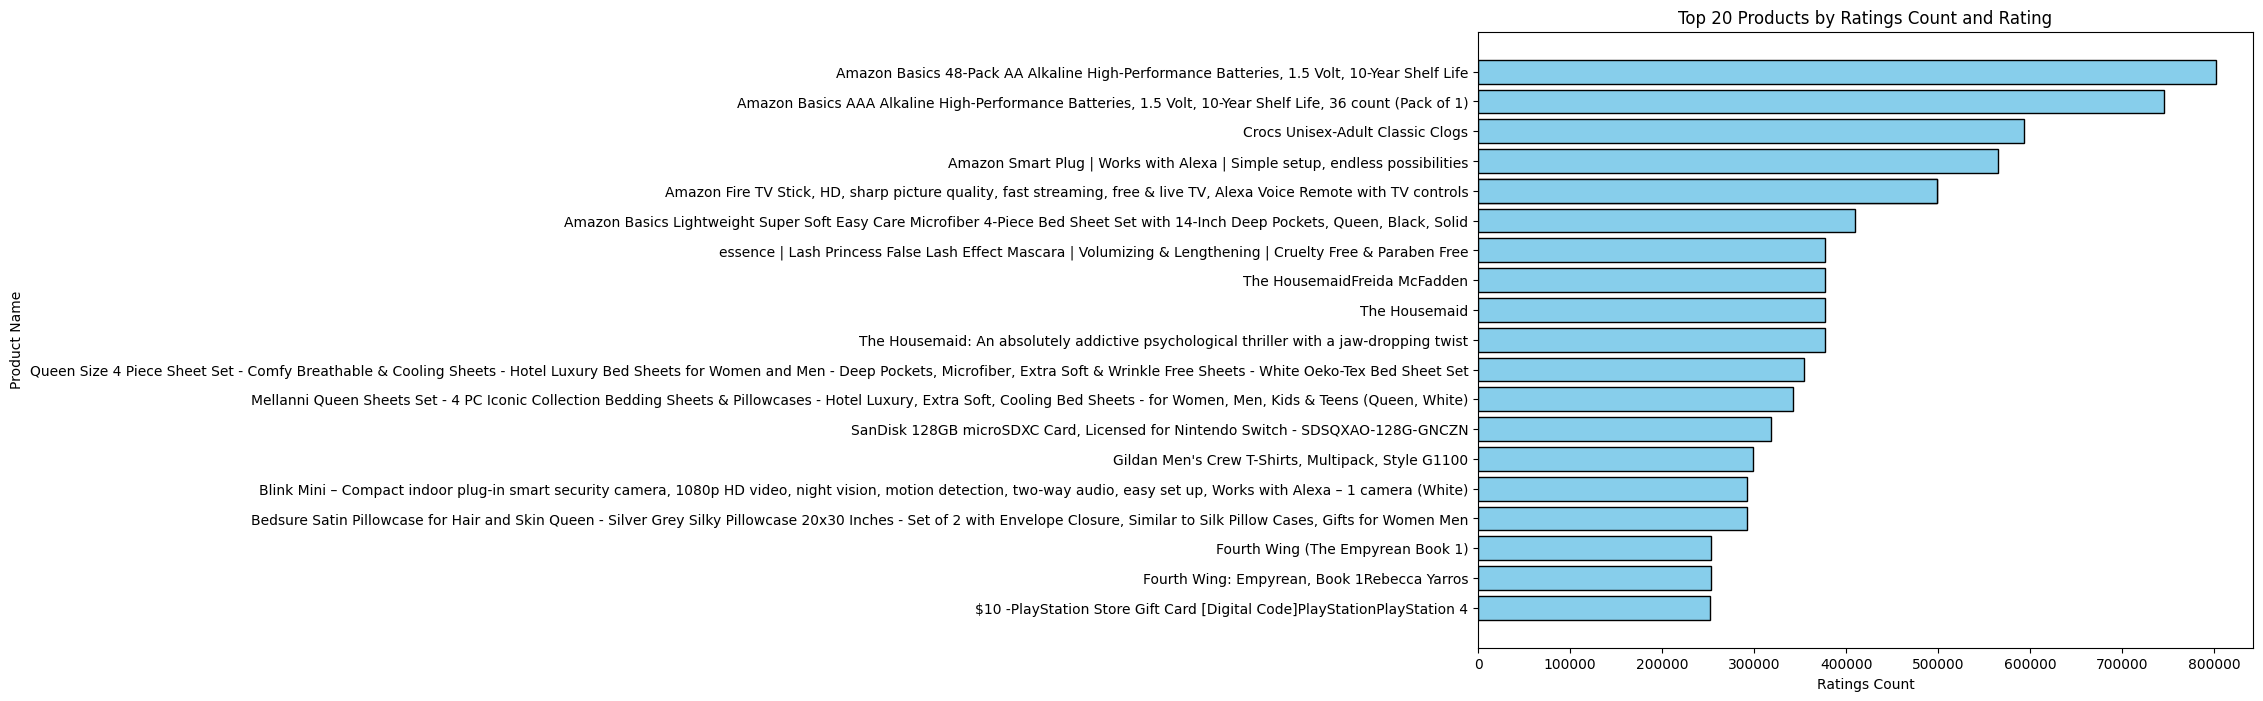

In [34]:
# identify the top 20 products by rating_count and rating for all categories

# Sort the dataframe by rating_count and rating in descending order
top_products = df.sort_values(['ratings_count', 'rating'], ascending=[False, False]).reset_index(drop=True)

# Get the top 20 products
top_20_products = top_products.head(20)

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_20_products['name'], top_20_products['ratings_count'], color='skyblue', edgecolor='black')
plt.gca().invert_yaxis()  # Invert y-axis to show highest-rated product at the top

# Adding labels and title
plt.xlabel('Ratings Count')
plt.ylabel('Product Name')
plt.title('Top 20 Products by Ratings Count and Rating')

# Show the plot
plt.tight_layout()
plt.show()

2. What products have the highest Sale Revenue?

<ipython-input-35-473ec74268be>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


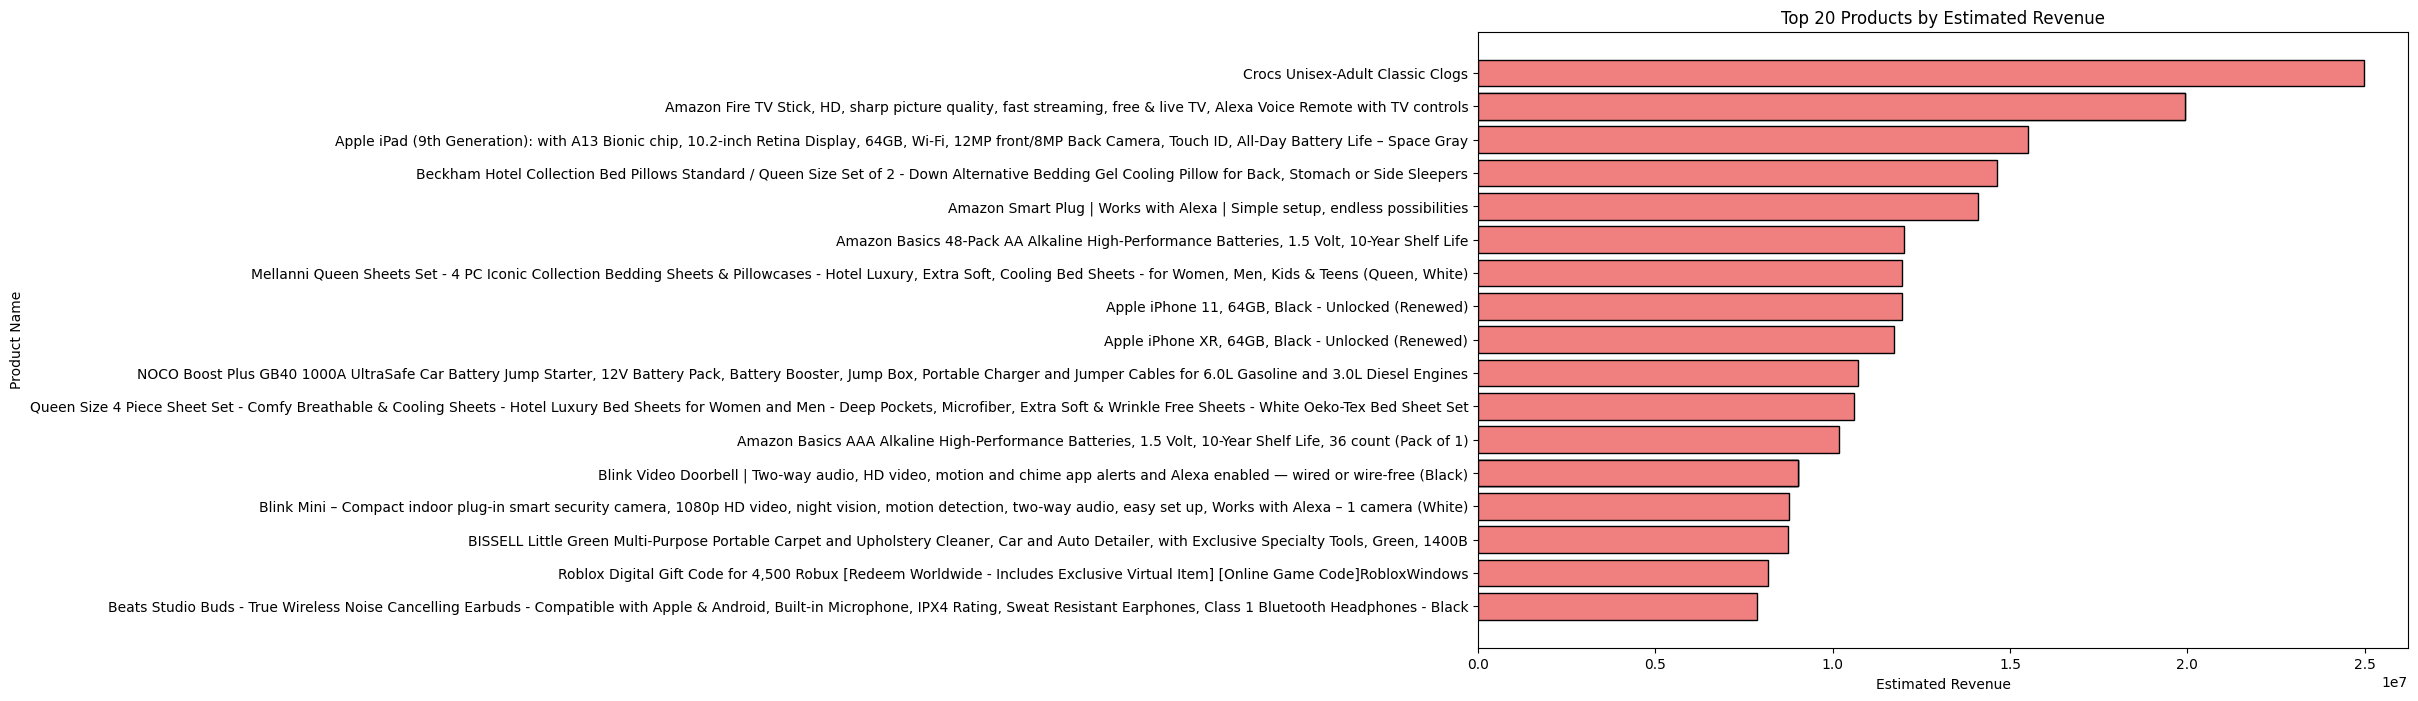

In [35]:
# identify the top products by estimated_revenue for all categories

# Identify the top products by estimated_revenue
top_products_revenue = df.sort_values('estimated_revenue', ascending=False).reset_index(drop=True).head(20)

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_products_revenue['name'], top_products_revenue['estimated_revenue'], color='lightcoral', edgecolor='black')
plt.gca().invert_yaxis()  # Invert y-axis to show highest revenue product at the top

# Adding labels and title
plt.xlabel('Estimated Revenue')
plt.ylabel('Product Name')
plt.title('Top 20 Products by Estimated Revenue')

# Show the plot
plt.tight_layout()
plt.show()

3. Show all the rank 1 product by ratings count

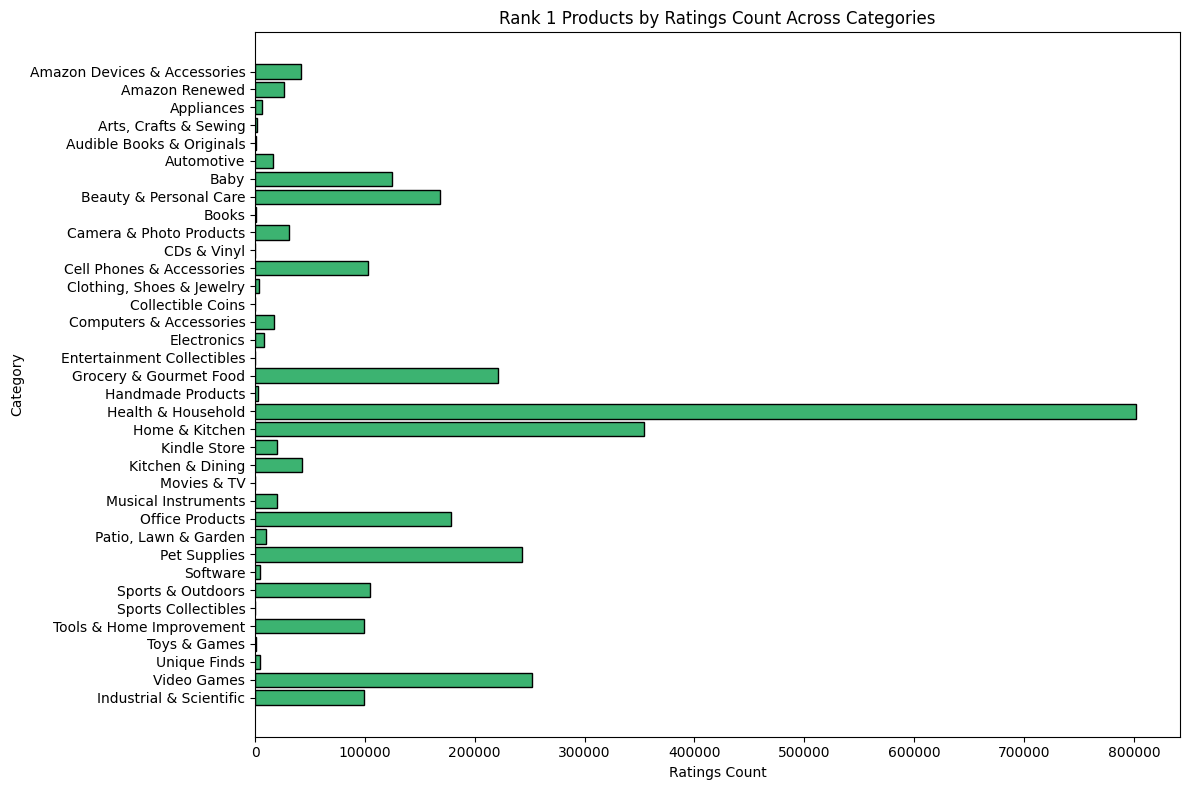

In [36]:
#indentify all the product who 'rank' = 1

# Filter the DataFrame to include only rows where 'rank' is equal to 1
rank_1_products = df[df['rank'] == 1]

# Display the products with rank 1
rank_1_productts = rank_1_products.sort_values(['ratings_count', 'rating'], ascending=False).reset_index(drop=True)

# Plotting a bar chart
plt.figure(figsize=(12, 8))
plt.barh(rank_1_products['category'], rank_1_products['ratings_count'], color='mediumseagreen', edgecolor='black')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest ratings count at the top

# Adding labels and title
plt.xlabel('Ratings Count')
plt.ylabel('Category')
plt.title('Rank 1 Products by Ratings Count Across Categories')

# Show the plot
plt.tight_layout()
plt.show()

4. What are the top-rated categories?

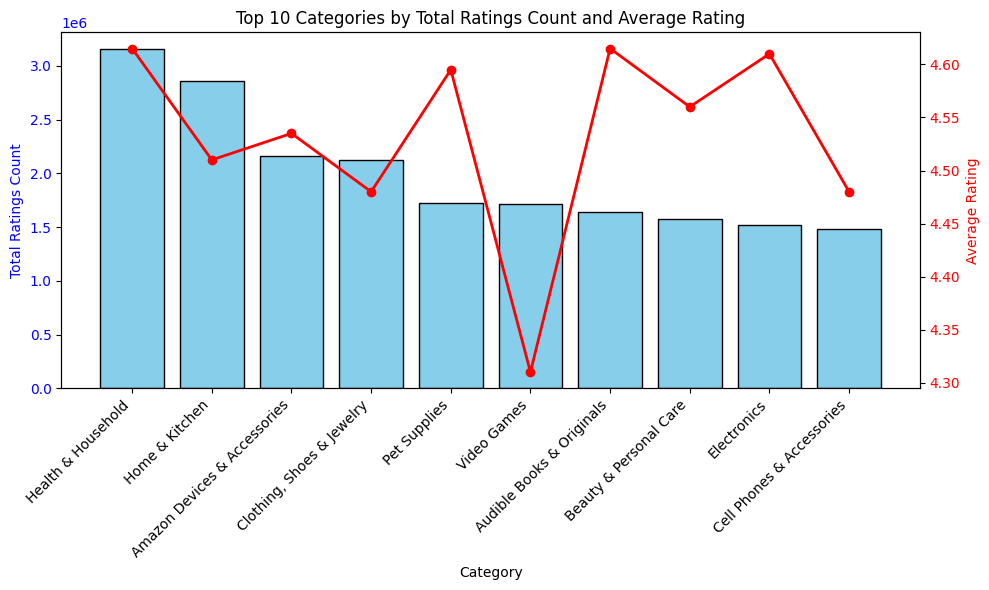

In [38]:
# Indentify the top 10 categories what has the highest sum of 'rantings_count' and average 'rating'

# Group by category and calculate the sum of ratings_count and average rating
category_ratings = df.groupby('category').agg({'ratings_count': 'sum', 'rating': 'mean'})

# Sort by ratings_count and rating in descending order
top_categories = category_ratings.sort_values(['ratings_count', 'rating'], ascending=[False, False])

# Get the top 10 categories
top_10_categories = top_categories.head(10)

# Plotting the dual-axis chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for the sum of ratings count
ax1.bar(top_10_categories.index, top_10_categories['ratings_count'], color='skyblue', edgecolor='black')
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Ratings Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Line plot for the average rating on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(top_10_categories.index, top_10_categories['rating'], color='red', marker='o', linewidth=2)
ax2.set_ylabel('Average Rating', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and layout adjustments
plt.title('Top 10 Categories by Total Ratings Count and Average Rating')
plt.tight_layout()
plt.show()

5. What are the top categories by estimated revenue?

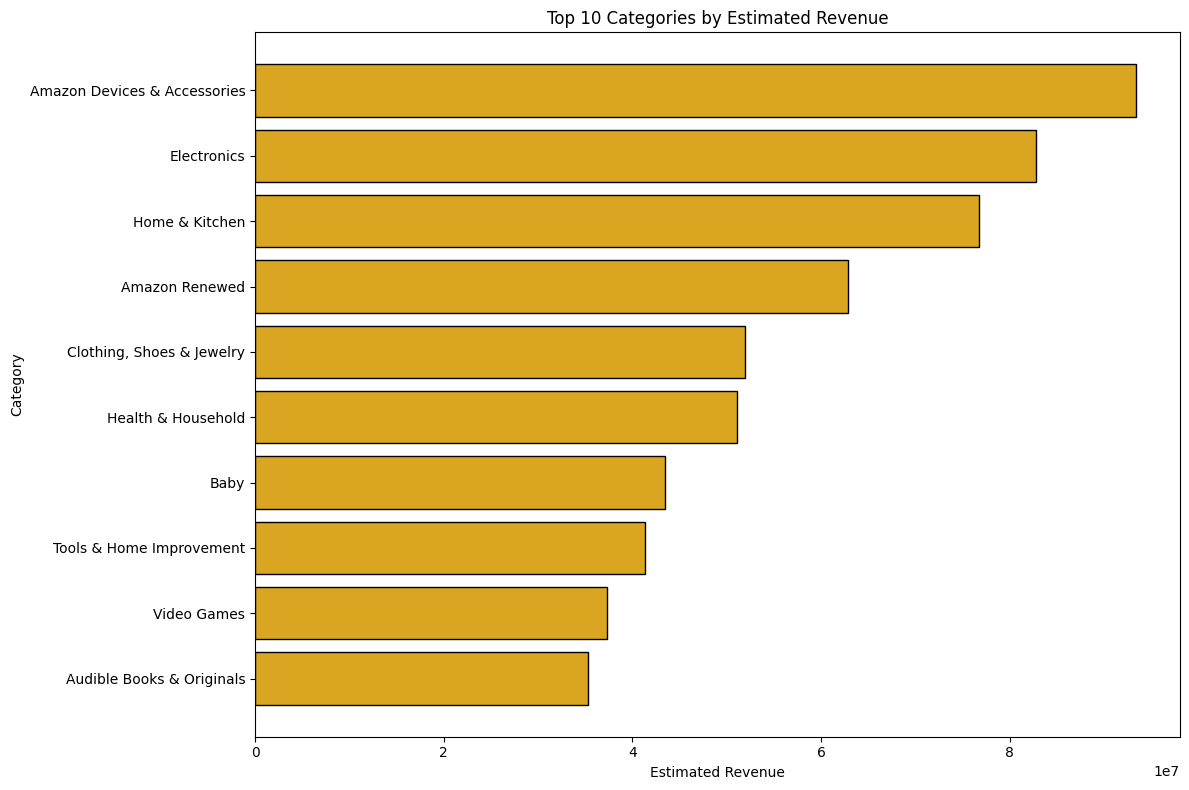

In [39]:
# Identify the top 10 categories with the highest sum of 'estimated_revenue'

# Group by category and calculate the sum of estimated_revenue
category_revenue = df.groupby('category')['estimated_revenue'].sum()

# Sort by estimated_revenue in descending order
top_categories_revenue = category_revenue.sort_values(ascending=False).reset_index()

# Get the top 10 categories
top_10_categories_revenue = top_categories_revenue.head(10)

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_10_categories_revenue['category'], top_10_categories_revenue['estimated_revenue'], color='goldenrod', edgecolor='black')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest revenue at the top

# Adding labels and title
plt.xlabel('Estimated Revenue')
plt.ylabel('Category')
plt.title('Top 10 Categories by Estimated Revenue')

# Show the plot
plt.tight_layout()
plt.show()

6. What are the best-value products base on the price-to-qulity ratio?

<ipython-input-41-626f406298ec>:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


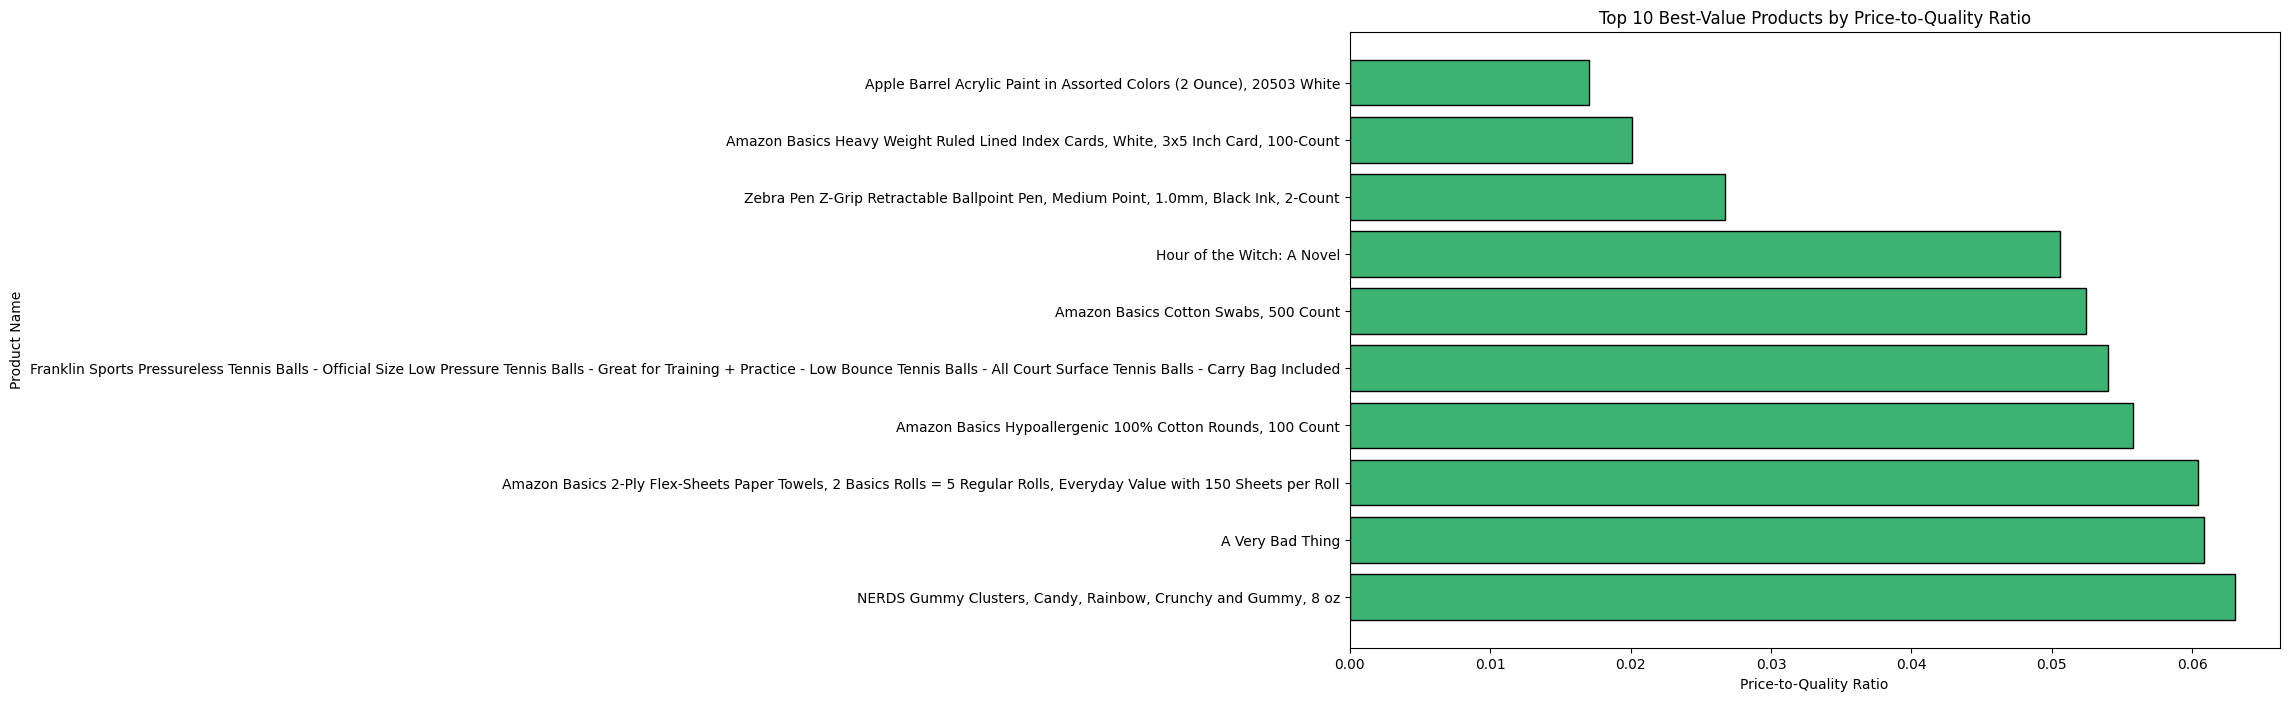

In [41]:
# Indentify the best-value products base on the 'price_to_quality_ratio'

# Filter out rows with ratings_count = 0 and price = 0
df_filtered = df[(df['ratings_count'] != 0) & (df['sale_price'] != 0)]

# Sort by price_to_quality_ratio in ascending order to get the best value products
best_value_products = df_filtered.sort_values('price_to_quality_ratio', ascending=True).reset_index(drop=True)

# Get the top 10 best-value products
top_10_best_value_products = best_value_products.head(10)

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_10_best_value_products['name'], top_10_best_value_products['price_to_quality_ratio'], color='mediumseagreen', edgecolor='black')
plt.gca().invert_yaxis()  # Invert y-axis to show the best-value product at the top

# Adding labels and title
plt.xlabel('Price-to-Quality Ratio')
plt.ylabel('Product Name')
plt.title('Top 10 Best-Value Products by Price-to-Quality Ratio')

# Show the plot
plt.tight_layout()
plt.show()

7. What are the best seller brands?

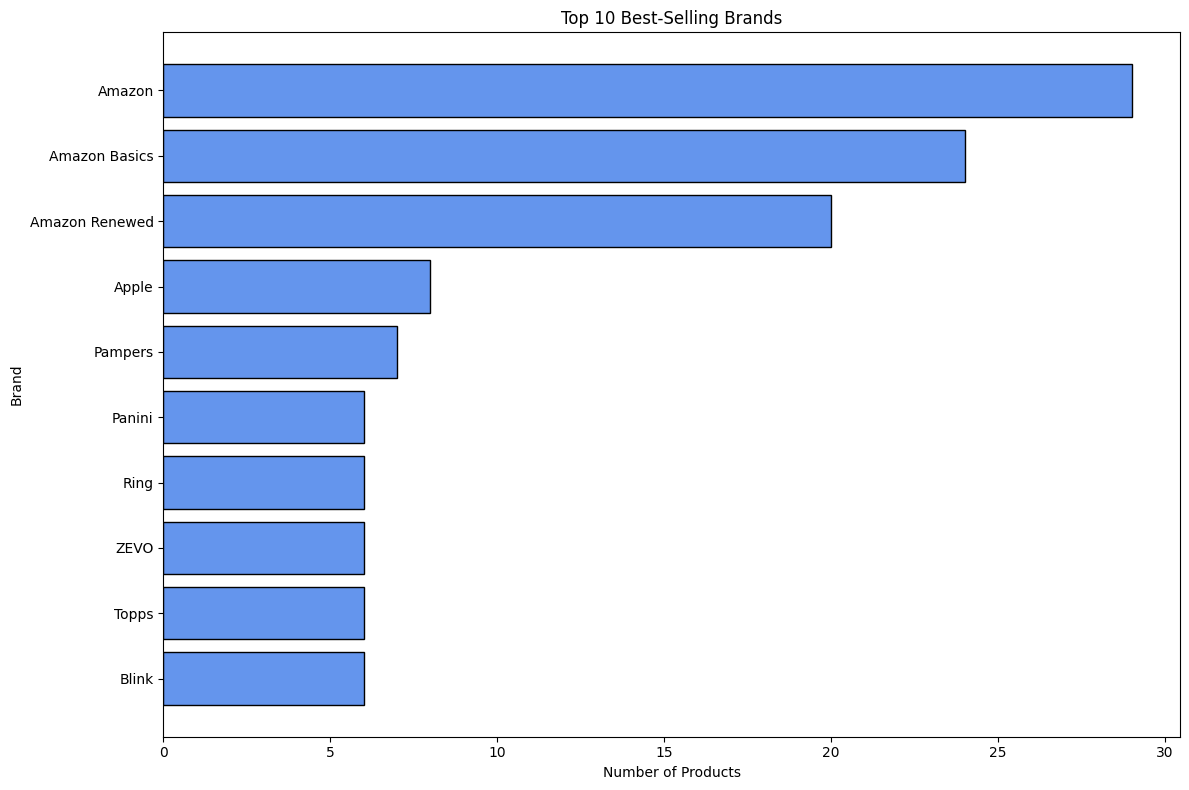

In [42]:
# Filter out rows with 'brand' equal to 'Unknown'
df_filtered_brand = df[df['brand'] != 'Unknown']

# Count the occurrences of each brand
brand_counts = df_filtered_brand['brand'].value_counts()

# Get the top 10 brands
top_10_brands = brand_counts.head(10)

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_10_brands.index, top_10_brands.values, color='cornflowerblue', edgecolor='black')
plt.gca().invert_yaxis()  # Invert y-axis to show the most popular brand at the top

# Adding labels and title
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.title('Top 10 Best-Selling Brands')

# Show the plot
plt.tight_layout()
plt.show()

8. What categories have the best average rating?

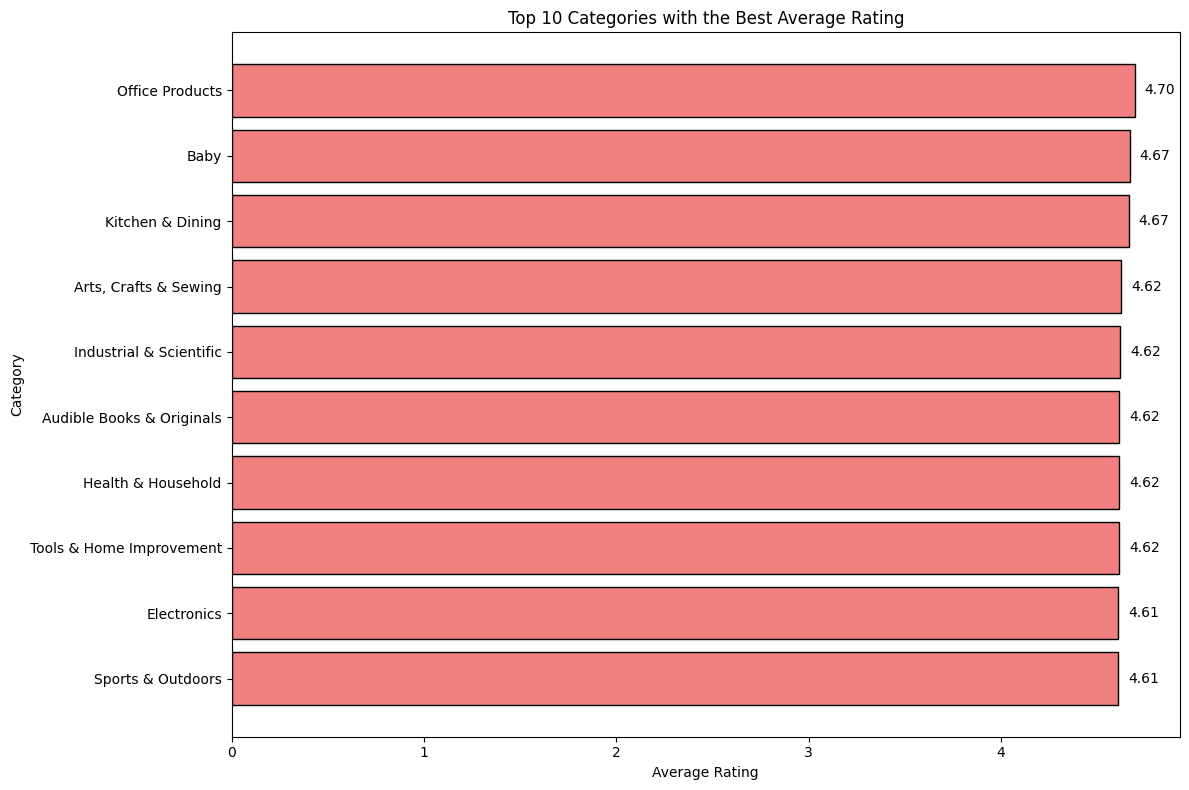

In [45]:
# Group by category and calculate the average rating
category_avg_rating = df.groupby('category')['rating'].mean()

# Sort by average rating in descending order
top_categories_avg_rating = category_avg_rating.sort_values(ascending=False)

# Get the top 10 categories with the best average rating
top_10_categories_avg_rating = top_categories_avg_rating.head(10)

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_categories_avg_rating.index, top_10_categories_avg_rating.values, color='lightcoral', edgecolor='black')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest-rated category at the top

# Adding labels and title
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Top 10 Categories with the Best Average Rating')

# Adding value labels with more precision (two decimal places)
for bar, value in zip(bars, top_10_categories_avg_rating.values):
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f'{value:.2f}', va='center')

# Show the plot
plt.tight_layout()
plt.show()

9. Comparing Product Popularity and Pricing



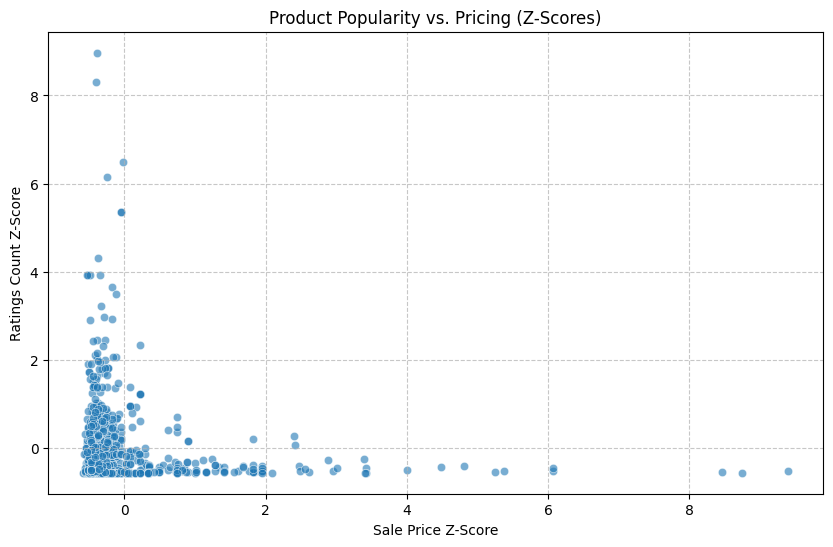

In [27]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['sale_price_zscore'], df['ratings_count_zscore'], alpha=0.6, edgecolors='w', linewidth=0.5)

# Adding plot labels and title
plt.title("Product Popularity vs. Pricing (Z-Scores)")
plt.xlabel("Sale Price Z-Score")
plt.ylabel("Ratings Count Z-Score")

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

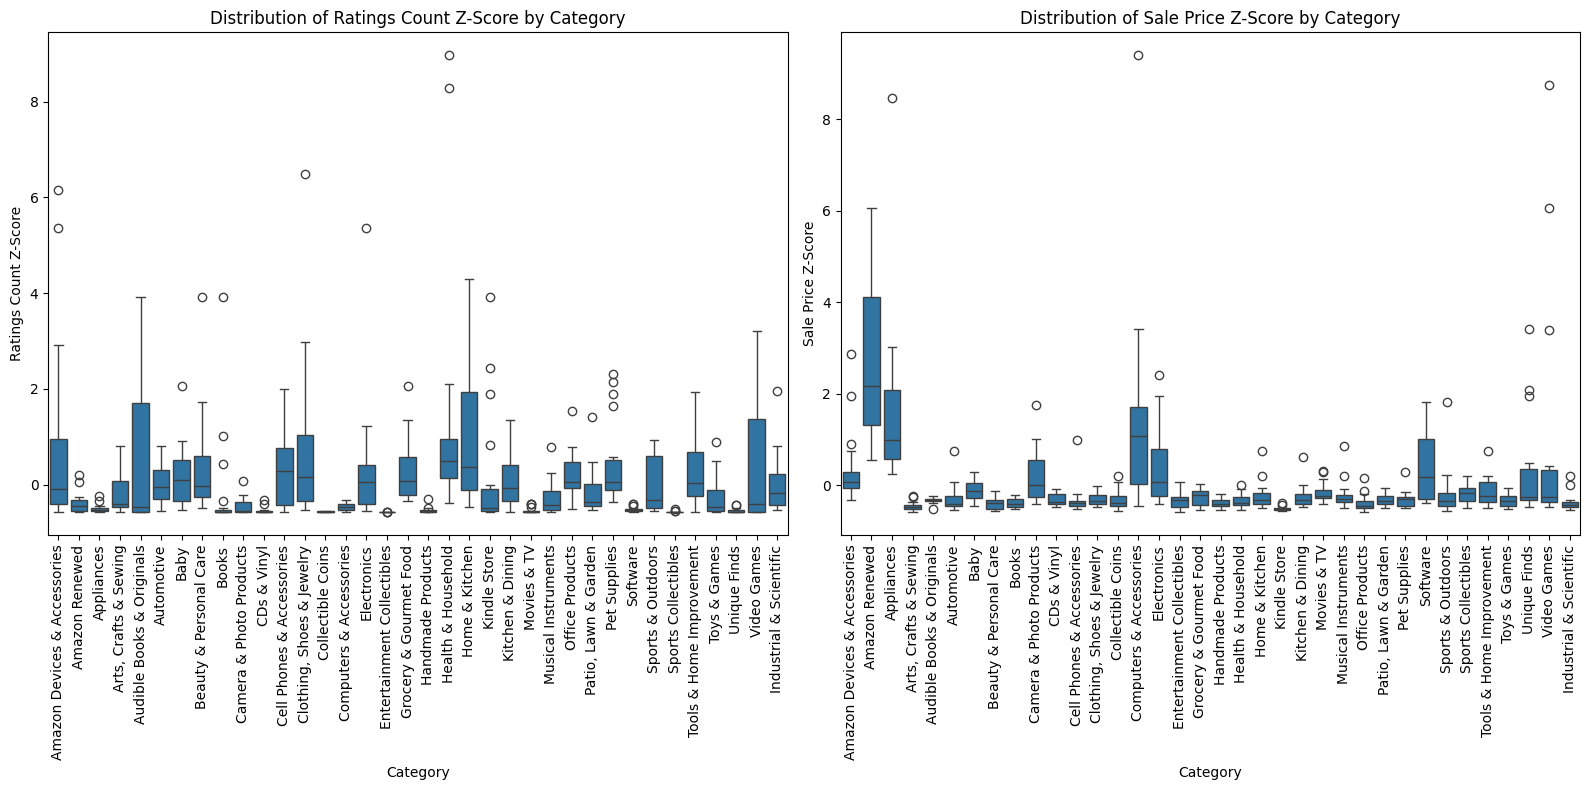

In [33]:
# Plotting Box Plots for Ratings and Price within each Category

plt.figure(figsize=(16, 8))

# Box plot for ratings_count_zscore by category
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='category', y='ratings_count_zscore')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title("Distribution of Ratings Count Z-Score by Category")
plt.xlabel("Category")
plt.ylabel("Ratings Count Z-Score")

# Box plot for sale_price_zscore by category
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='category', y='sale_price_zscore')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title("Distribution of Sale Price Z-Score by Category")
plt.xlabel("Category")
plt.ylabel("Sale Price Z-Score")

plt.tight_layout()
plt.show()
